### Data Description

**price**
price in US dollars (\$326--\$18,823)

**carat**
weight of the diamond (0.2--5.01)

**cut**
quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color**
diamond colour, from J (worst) to D (best)

**clarity**
a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x**
length in mm (0--10.74)

**y**
width in mm (0--58.9)

**z**
depth in mm (0--31.8)

**depth**
total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table**
width of top of diamond relative to widest point (43--95)

## Importing necessary libraries

In [1]:
# Importing necessary libraries:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

## Importing dataset

In [3]:
# Importing the data:
from dbsconnector.databases import MongoDB
df = MongoDB("mongodb://localhost:27017").load_data("diamond-price-prediction-db", "diamond-data")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
# id column can be removed:
df.drop('id', axis=1, inplace=True)

In [5]:
# Shape of the data:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

The dataset contains 193573 rows and 10 columns


### Training and Testing dataset

In [6]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.3, random_state=45)

### General Analysis on the data

In [7]:
# Copy test_df to data:
data = train_df.copy()

In [8]:
# Columns:
print(list(data.columns))

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price']


In [9]:
# Duplicated rows:
data.duplicated().sum()

0

In [10]:
# Null values:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [11]:
# Datatype of each column:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [12]:
# List of numeric and categoric varible:
num_col = []
cate_col = []

for col in data.columns:
    if data[col].dtype=='object':
        cate_col.append(col)
    else:
        num_col.append(col)

print(f"Numeric Columns: {num_col}\nCategoric Columns: {cate_col}")

Numeric Columns: ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
Categoric Columns: ['cut', 'color', 'clarity']


In [13]:
# Description of Numeric columns:
data[num_col].describe()

,carat,depth,table,x,y,z,price
count,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000
mean,0.790867,61.820891,57.229403,5.716238,5.720953,3.534857,3970.499915
std,0.462069,1.081624,1.921006,1.108130,1.101058,0.689382,4032.214099
min,0.200000,52.200000,51.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,954.000000
50%,0.700000,61.900000,57.000000,5.710000,5.720000,3.530000,2410.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5396.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [14]:
# Description of Categoric columns:
data[cate_col].describe()

,cut,color,clarity
count,135501,135501,135501
unique,5,7,8
top,Ideal,G,SI1
freq,64737,30967,37308


In [15]:
# Unique values in categoric columns:
for col in cate_col:
    print(f"{col}---> {data[col].unique()}")

cut---> ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
color---> ['D' 'H' 'G' 'F' 'J' 'E' 'I']
clarity---> ['SI1' 'VS2' 'VVS2' 'VS1' 'SI2' 'VVS1' 'I1' 'IF']


In [16]:
# value counts of categoric variables:
for col in cate_col:
    print(f"{data[col].value_counts()}\n{'-'*30}")

cut
Ideal        64737
Premium      34939
Very Good    26262
Good          8161
Fair          1402
Name: count, dtype: int64
------------------------------
color
G    30967
E    25193
F    23978
H    21612
D    17007
I    12189
J     4555
Name: count, dtype: int64
------------------------------
clarity
SI1     37308
VS2     33562
VS1     21478
SI2     21379
VVS2    11111
VVS1     7434
IF       2881
I1        348
Name: count, dtype: int64
------------------------------


### EDA

#### Numeric Columns

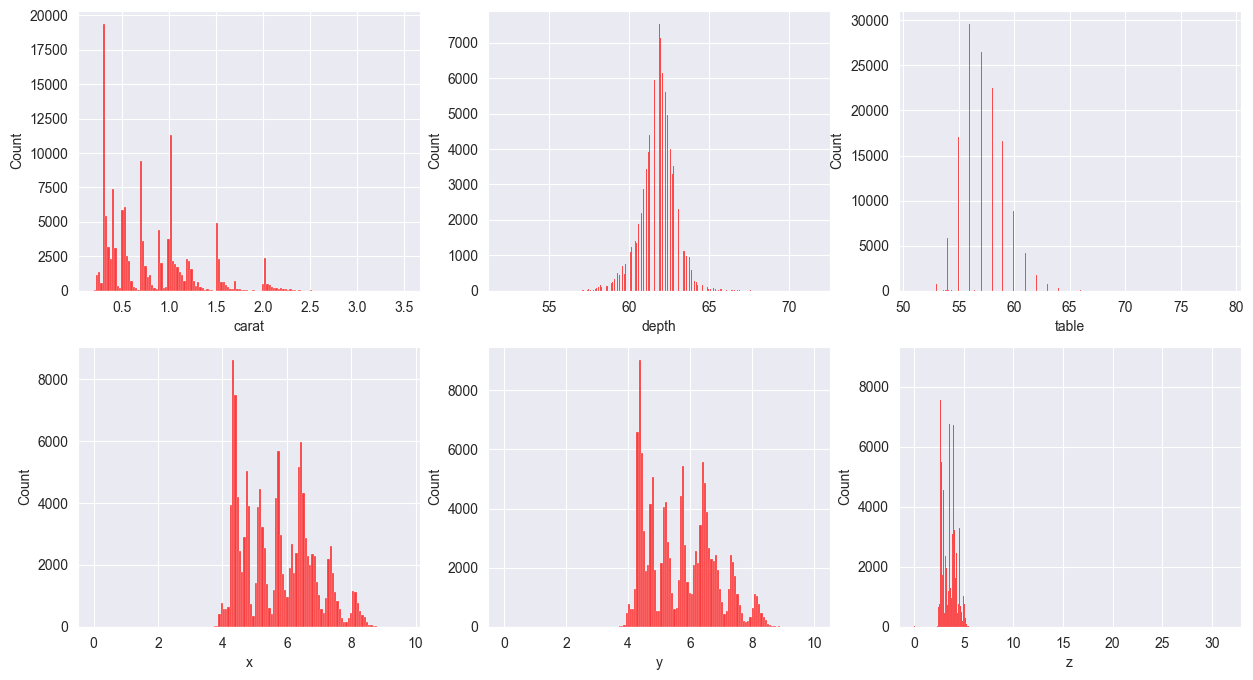

In [17]:
# Distribution of Numeric Columns (Histograms):

plt.figure(figsize=(15,8))

for index in range(len(num_col)-1):
    plt.subplot(2,3,index+1)
    sns.histplot(data, x=num_col[index], color="red")
    

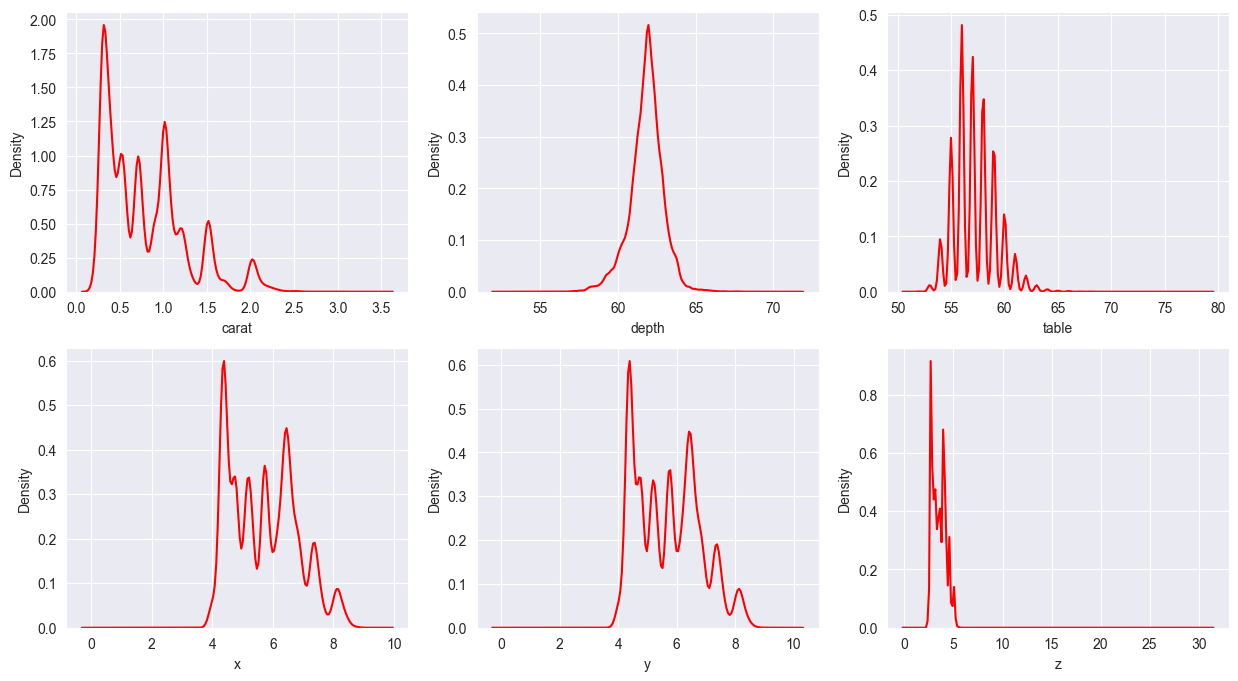

In [18]:
# Distribution of numeric columns (KDE):

plt.figure(figsize=(15,8))

for index in range(len(num_col)-1):
    plt.subplot(2,3,index+1)
    sns.kdeplot(data, x=num_col[index], color="red")


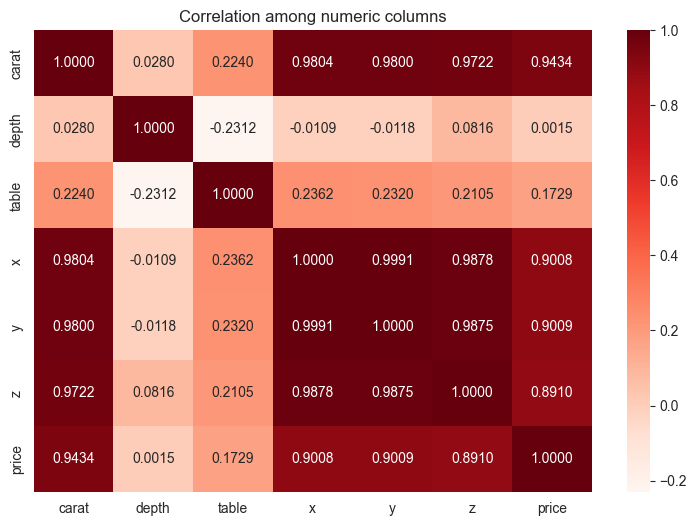

In [19]:
# correlation among numeric columns:

plt.figure(figsize=(9,6))
sns.heatmap(data[num_col].corr(), annot=True, fmt="0.4f", cmap="Reds")
plt.title("Correlation among numeric columns")
plt.show()

- Here most of the numeric columns have high positive correlation with "price"(target) column.

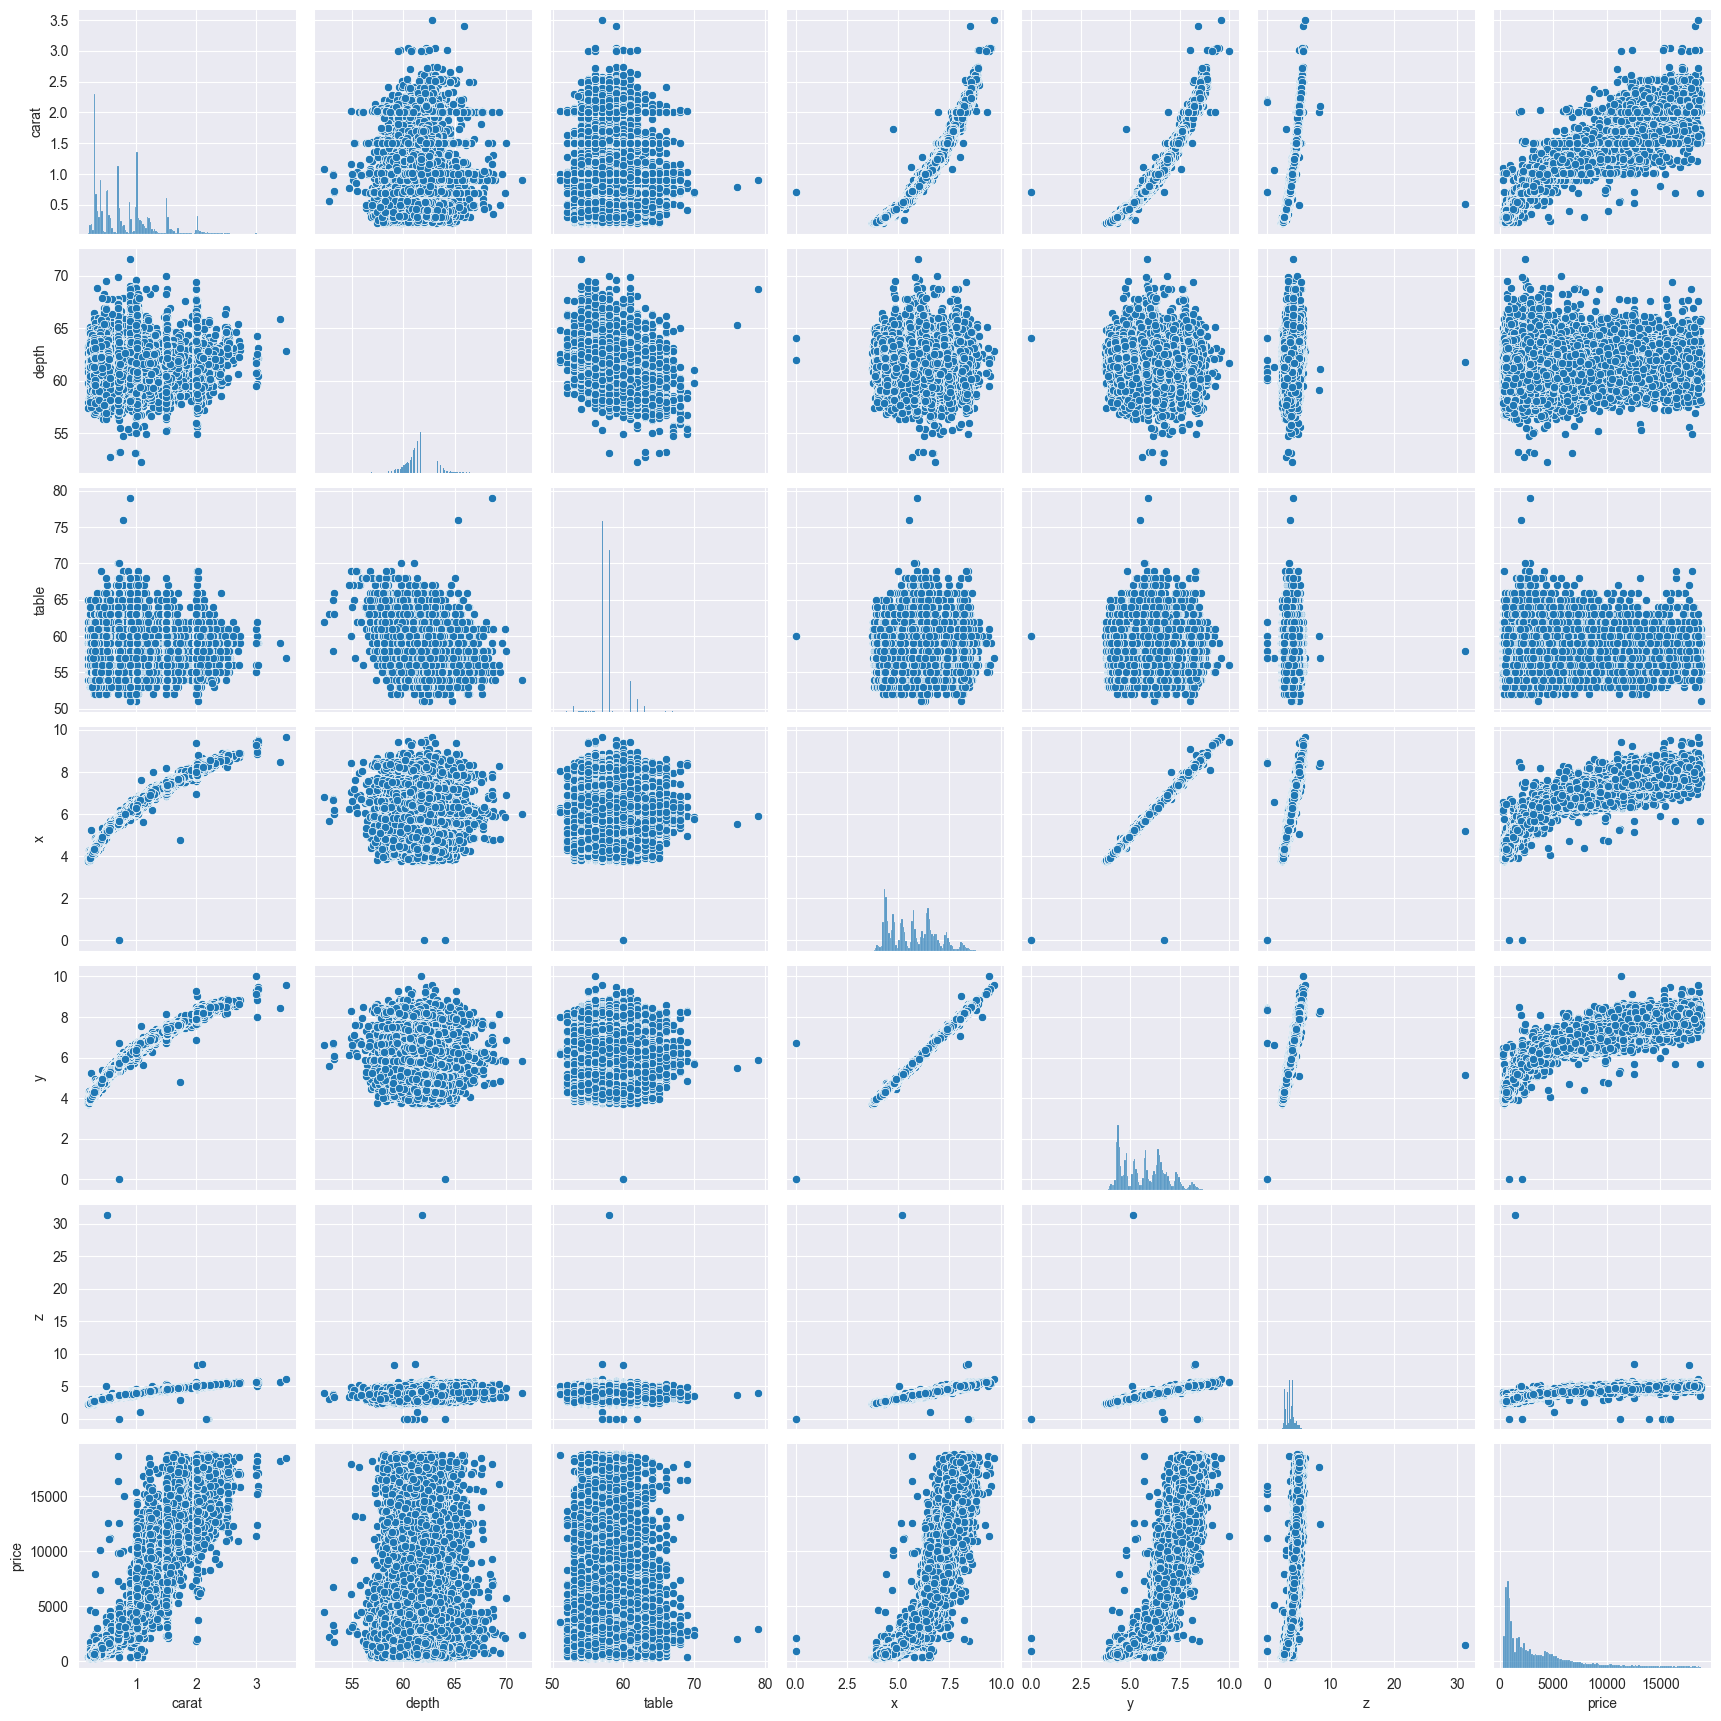

In [21]:
# Multidimension scatterplot for better understanding:

sns.pairplot(data[num_col])
plt.show()

#### Categoric columns

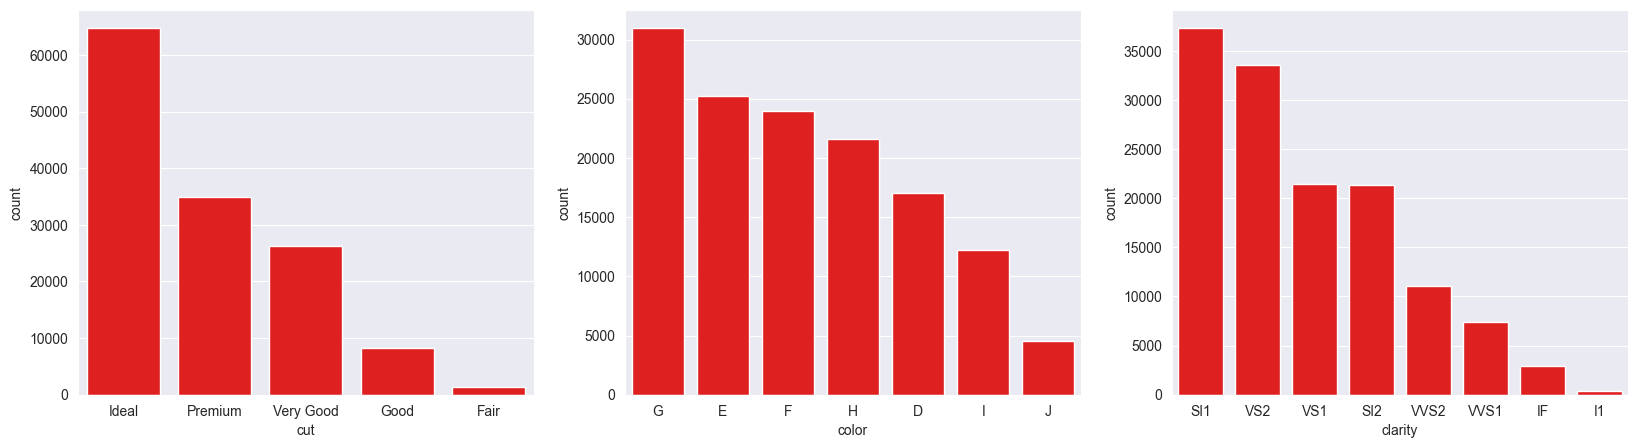

In [22]:
# Frequency distribution of categoric data:

plt.figure(figsize=(20,5))
for index,column in enumerate(cate_col):
    plt.subplot(1,3,index+1)
    sns.countplot(data, x=column, order=list(data[column].value_counts().index),
                  color="red")

## Preprocessing Pipeline

In [23]:
# Importing libraries for preprocessing pipeline:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### Independent and Dependent Features

In [24]:
# Independent and Dependent Features:
X_train = train_df.drop('price', axis=1)
y_train = train_df['price']
X_test = test_df.drop('price', axis=1)
y_test = test_df['price']

# remove 'price' from num_col list:
num_col.remove('price')

### Numeric Pipeline

In [25]:
# Numeric Pipeline:

num_steps = [
    ('imputing', SimpleImputer(strategy='median')),
    ('scaling', RobustScaler())
]

num_pipe = Pipeline(num_steps)
num_pipe

Pipeline(steps=[('imputing', SimpleImputer(strategy='median')),
                ('scaling', RobustScaler())])

### Categoric Pipeline

In [26]:
# Categoric Pipeline:

cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']


cate_steps = [
    ('imputing', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoding', OrdinalEncoder(categories=[cut_order, color_order, clarity_order]))
]

cate_pipe = Pipeline(cate_steps)
cate_pipe

Pipeline(steps=[('imputing', SimpleImputer(strategy='most_frequent')),
                ('ordinal_encoding',
                 OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good',
                                             'Premium', 'Ideal'],
                                            ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                                            ['I1', 'SI2', 'SI1', 'VS2', 'VS1',
                                             'VVS2', 'VVS1', 'IF']]))])

### Final Pipeline

In [54]:
# Final Pipeline:

preprocessor_steps = [
    ('numeric_pipeline', num_pipe, num_col),
    ('categoric_pipeline', cate_pipe, cate_col)
]

preprocessor = ColumnTransformer(preprocessor_steps, remainder='passthrough')
preprocessor.set_output(transform='pandas')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric_pipeline',
                                 Pipeline(steps=[('imputing',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling', RobustScaler())]),
                                 ['carat', 'depth', 'table', 'x', 'y', 'z']),
                                ('categoric_pipeline',
                                 Pipeline(steps=[('imputing',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal_encoding',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal'],
                                                                             ['J',
                                                                              'I',
                                                                              'H',
                                                                              'G',
                                                                              'F',
                                                                              'E',
                                                                              'D'],
                                                                             ['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']]))]),
                                 ['cut', 'color', 'clarity'])])

### Training and Testing Data

### Preprocessing Training data

In [55]:
# Preprocessing train dataset:
X_train_transform = preprocessor.fit_transform(X_train)
X_train_transform.head()

,numeric_pipeline__carat,numeric_pipeline__depth,numeric_pipeline__table,numeric_pipeline__x,numeric_pipeline__y,numeric_pipeline__z,categoric_pipeline__cut,categoric_pipeline__color,categoric_pipeline__clarity
132222,-0.269841,0.727273,0.0,-0.303867,-0.283333,-0.238938,4.0,6.0,2.0
94363,-0.222222,-1.636364,1.0,-0.209945,-0.205556,-0.283186,3.0,2.0,3.0
170441,-0.634921,0.181818,0.5,-0.795580,-0.777778,-0.761062,4.0,6.0,5.0
65061,2.126984,0.454545,0.0,1.342541,1.300000,1.353982,4.0,2.0,2.0
192532,-0.555556,0.272727,-1.0,-0.668508,-0.661111,-0.628319,4.0,3.0,4.0


### Preprocessing Test Data

In [56]:
# Preprocessing test dataset:
X_test_transform = preprocessor.transform(X_test)
X_test_transform.head()

,numeric_pipeline__carat,numeric_pipeline__depth,numeric_pipeline__table,numeric_pipeline__x,numeric_pipeline__y,numeric_pipeline__z,categoric_pipeline__cut,categoric_pipeline__color,categoric_pipeline__clarity
75254,0.492063,-0.818182,-1.0,0.436464,0.450000,0.389381,4.0,4.0,3.0
120559,-0.730159,-0.727273,1.0,-0.955801,-0.950000,-0.964602,2.0,6.0,5.0
26643,-0.587302,-0.090909,-1.0,-0.712707,-0.700000,-0.699115,2.0,2.0,5.0
69483,-0.222222,-0.818182,1.5,-0.215470,-0.238889,-0.256637,3.0,4.0,3.0
25222,0.317460,-3.454545,1.0,0.292818,0.272222,0.088496,3.0,6.0,2.0


## Model Training Testing and Validation

In [57]:
# Importing necessary libraries for model training, testing and validating:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import r2_score

## Hyperparameter Tuning

In [58]:
train_df = pd.concat([X_train_transform, y_train], axis=1)
test_df = pd.concat([X_test_transform, y_test], axis=1)

In [59]:
def get_models():
    models = {
        "linearregression": (LinearRegression(), {}),
        "lasso": (Lasso(), {"alpha": [0.1, 1.0, 10.0]}),
        "ridge": (Ridge(), {"alpha": [0.1, 1.0, 10.0]}),
        "elasticnet": (ElasticNet(), {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]})
    }
    
    return models
    

def train_evaluate_models(train_data, nsplit):

    models = get_models()
    kfold = KFold(n_splits=nsplit, shuffle=True, random_state=42)

    trained_model_name = []
    trained_model = []
    R2Score = []

    for train_index, val_index in kfold.split(train_data):
        train, val = train_data.iloc[train_index], train_data.iloc[val_index]

        X_train = train.drop('price', axis=1)
        y_train = train['price']
        X_val = val.drop('price', axis=1)
        y_val = val['price']

        for name, (model, params) in models.items():
            if params:
                grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='r2')
                grid_search.fit(X_train, y_train)
                best_model = grid_search.best_estimator_
                pass
            else:
                model.fit(X_train, y_train)
                best_model = model

            y_pred = best_model.predict(X_val)
            R2 = r2_score(y_val, y_pred)

            trained_model_name.append(name)
            trained_model.append(best_model)
            R2Score.append(R2)

    performance_df = pd.DataFrame()
    performance_df['trained_model_name'] = trained_model_name
    performance_df['trained_model'] = trained_model
    performance_df['R2Score'] = R2Score

    performance = performance_df.sort_values(by='R2Score', ascending=False).reset_index(drop=True)

    return performance


In [60]:
per_data = train_evaluate_models(train_df, 5)

In [61]:
per_data

,trained_model_name,trained_model,R2Score
0,lasso,Lasso(),0.937637
1,linearregression,LinearRegression(),0.937628
2,ridge,Ridge(alpha=0.1),0.937628
3,linearregression,LinearRegression(),0.937560
4,ridge,Ridge(alpha=0.1),0.937560
5,lasso,Lasso(),0.937500
6,lasso,Lasso(),0.936518
7,linearregression,LinearRegression(),0.936513
8,ridge,Ridge(alpha=0.1),0.936513
9,lasso,Lasso(),0.936465


In [62]:
model = per_data.loc[0,'trained_model']
model

Lasso()

In [63]:
X_test = test_df.drop('price', axis=1)
y_test = test_df['price']

In [64]:
y_predict = model.predict(X_test)

In [65]:
r2_score(y_test, y_predict)

0.9366411314210934